## Machine Learning Algorithms without Scikit-Learn

In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [21]:
data = load_boston()

In [47]:
df_boston = data.data
df_boston.shape

(506, 13)

In [39]:
df_target = data.target
df_target.shape

(506,)

In [30]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [29]:
df_table = pd.DataFrame(data=df_boston, columns=data.feature_names)
df_table.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [43]:
df_table = df_table.join(pd.Series(np.transpose(df_target), name='PRICE'))
df_table.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [61]:
pd.notna(df_table).all()

CRIM       True
ZN         True
INDUS      True
CHAS       True
NOX        True
RM         True
AGE        True
DIS        True
RAD        True
TAX        True
PTRATIO    True
B          True
LSTAT      True
PRICE      True
dtype: bool

In [65]:
df_table.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [92]:
features_mean = (df_table.mean()[0:13]).to_numpy()
diff_max_min = ((df_table.max() - df_table.min())[0:13]).to_numpy()

In [97]:
scaled_df_boston = (df_boston - features_mean)/diff_max_min

In [256]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df_boston, df_target, test_size=0.3, random_state = 0)

In [257]:
X0 = np.ones([X_train.shape[0], 1])
X_train_X0 = np.concatenate((X0, X_train), axis=1)
Theta = np.zeros([X_train_X0.shape[1]])

In [258]:
h_theta = np.sum(X_train_X0*Theta, axis=1)

In [259]:
h_theta = np.sum(X_train_X0*Theta, axis=1)
Cost = 1/(2*X_train_X0.shape[0])*np.sum(((h_theta - y_train)**2))
Cost
#Theta_temp = ((0.03)/(X_train_X0.shape[0]))*np.sum((h_theta - y_train)*(X_train_X0.transpose()), axis=1)
#h_theta = np.array([h_theta]).transpose()


301.06069209039543

In [260]:
i = 0
J_func = []
Theta = np.zeros([X_train_X0.shape[1]])
while i<10000 and Cost>8:
  h_theta = np.sum(X_train_X0*Theta, axis=1)
  Cost = 1/(2*X_train_X0.shape[0])*np.sum(((h_theta - y_train)**2))
  J_func.append(Cost)
  Theta_temp = ((0.05)/(X_train_X0.shape[0]))*np.sum((h_theta - y_train)*(X_train_X0.transpose()), axis=1)
  Theta = Theta - Theta_temp
  i = i+1
print(Cost, i)

9.983065993257522 10000


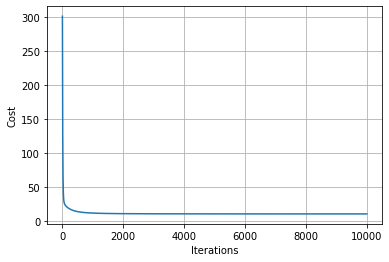

In [261]:
plt.plot(range(0,len(J_func)), J_func);

plt.ylabel('Cost');
plt.xlabel('Iterations');
plt.grid()

In [262]:
X0_test = np.ones([X_test.shape[0], 1])
X_test_X0 = np.concatenate((X0_test, X_test), axis=1)

In [263]:
h_theta_train = np.sum(X_train_X0*Theta, axis=1)
rms = np.sqrt(mean_squared_error(y_train, h_theta_train))
rms

4.468347358726871

In [264]:
h_theta_test = np.sum(X_test_X0*Theta, axis=1)
rms = np.sqrt(mean_squared_error(y_test, h_theta_test))
rms

5.214136563068659

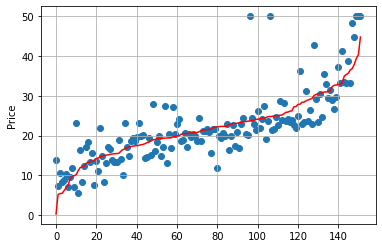

In [375]:
comparative = np.concatenate((np.array([y_test]).transpose(), np.array([h_theta_test]).transpose()), axis=1)

#Making the comparative matrix in crescent order (with respect with the predicted values)
comparative = comparative[comparative[:,1].argsort()]

plt.scatter(x=range(len(comparative[:,0])), y=comparative[:,0])
plt.plot(range(len(comparative[:,0])), comparative[:,1], color='red')

plt.grid()
plt.ylabel('Price');

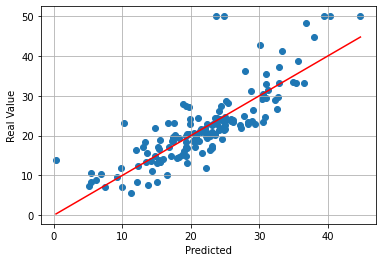

In [376]:
plt.scatter(x=comparative[:,1], y=comparative[:,0])
plt.plot(comparative[:,1], comparative[:,1], color='red')

plt.grid()
plt.xlabel('Predicted');
plt.ylabel('Real Value');

## Linear Regression with SkLearn

In [377]:
from sklearn.linear_model import LinearRegression

In [378]:
model = LinearRegression(fit_intercept=True, normalize=True)
model.fit(X_train, y_train);

In [379]:
model.score(X_test, y_test)

0.6733825506400195

In [380]:
comparative_sk = np.concatenate((np.array([y_test]).transpose(), np.array([model.predict(X_test)]).transpose()), axis=1)
comparative_sk = comparative_sk[comparative_sk[:,1].argsort()]

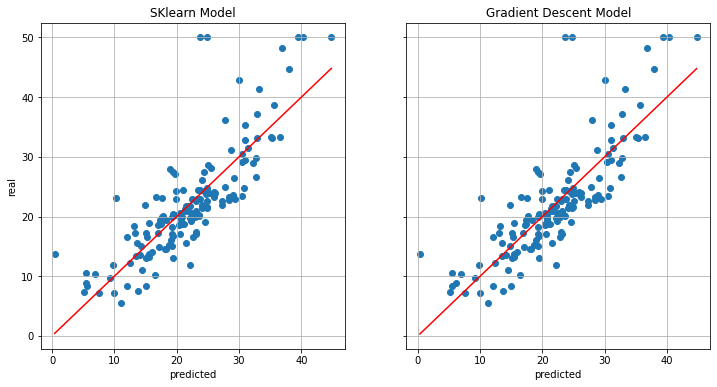

In [382]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey='row', figsize=(12,6))

ax1.scatter(x = comparative_sk[:,1], y = comparative_sk[:,0])
ax1.plot(comparative_sk[:,1], comparative_sk[:,1], color='red')
ax2.scatter(x = comparative[:,1], y = comparative[:,0])
ax2.plot(comparative[:,1], comparative[:,1], color='red')

ax1.grid();
ax2.grid();

ax1.set_ylabel('real')
ax1.set_xlabel('predicted')
ax2.set_xlabel('predicted')

ax1.set_title('SKlearn Model')
ax2.set_title('Gradient Descent Model');

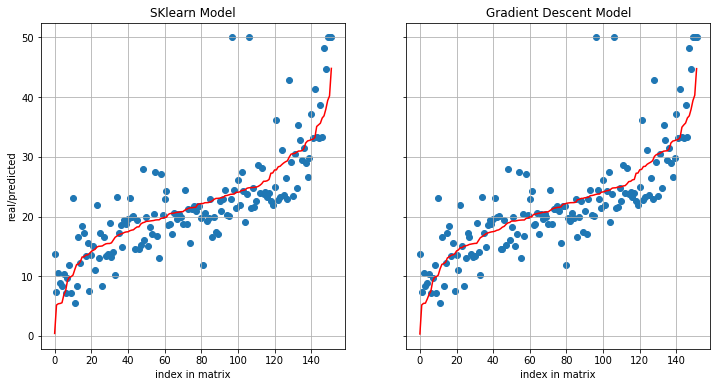

In [383]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey='row', figsize=(12,6))

ax1.scatter(x = range(len(comparative_sk[:,0])), y = comparative_sk[:,0])
ax1.plot(range(len(comparative_sk[:,0])), comparative_sk[:,1], color='red')
ax2.scatter(x=range(len(comparative[:,0])), y=comparative[:,0])
ax2.plot(range(len(comparative[:,0])), comparative[:,1], color='red')

ax1.grid();
ax2.grid();

ax1.set_ylabel('real/predicted')
ax1.set_xlabel('index in matrix')
ax2.set_xlabel('index in matrix')

ax1.set_title('SKlearn Model')
ax2.set_title('Gradient Descent Model');